In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import dbnomics
from dbnomics import fetch_series, fetch_series_by_api_link
import country_converter as coco
import functools
import requests
from bs4 import BeautifulSoup
import re
from sklearn.preprocessing import QuantileTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import os
os.environ['PROJ_LIB'] = 'C:/Users/USERNAME/Anaconda3/Lib/site-packages/mpl_toolkits/basemap'
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
pd.set_option("display.float_format", "{:,.2f}".format)
import warnings
warnings.simplefilter('ignore')

## Emerging Markets – short-term risks and long-term opportunities
### *COVID-19 pandemic is a once in a 100-year exogenous shock to the global economy that is heavily affecting Emerging Markets (EM) – which countries are most at risk of a full-blown economic crisis and which are likely to remain an attractive long-term growth story?*

### To answer this question, in this project we acquire and analyse two sets of factors:

1) Short-to-mid term risks - defined by three groups of economic metrics focused on Macro stability, External vulnerability and Institutional strength

2) Long-term opportunities - defined by the long-term determinants of economic growth: demography and productivity

### 1. INTRODUCTION
#### COVID-19 pandemic led to several shocks simultaneously for Emerging Markets:
- **Funding shock** – rapid financial markets outflows + US dollar liquidity squeeze (overcame by US Central bank for the moment)
- **Currency shock** – some EM currencies lost >20% in 2020, notably pushing external debt stocks and service levels
- **Commodity shock**– Bloomberg Commodity Index collapsed to 40-year low in the spring and recovered just half of its losses since then (Latin America and Middle East & Africa regions most affected)
- **Global tourism shock** – slump by 60-80% in 2020, largest since records began after World War II (Asia most affected but Latin America and Middle East & Africa also heavily exposed)
- **Supply chains shock** – the big disruption likely to result in long-term adjustments by Developed Markets (moving production closer or within borders) – critical for diffusion of innovation
- **Pandemic shock** - health systems constraints more severe than DM, lockdowns less effective due to packed suburbs, poorer hygiene
- **Policy Constraints** – just a few EM were not already operating with fiscal deficits before COVID-19, monetary stimulus less affective and more dangerous than in Developed Markets (DM)

In these turbulent times macroeconomic resilience is of paramount importance. The rich combination of risks is telling us that this and next year would be extremely challenging for Emerging Markets and the room for error for domestic policy makers is very thin.

### 1.1. COVID-19 global crisis to most affect economies with pre-existing conditions… where lies the risk?

**We look at three groups of factors** to investigate and quantify the pre-existing conditions across Emerging Markets:

**1) Macro Stability (risk of economic crisis)** – major economic metrics to determine the overall macro framework and imbalances, i.e. risk of economic crisis

**2) External Vulnerability (risk of Balance of Payments crisis)** – how exposed is a country to exogenous shocks and disruptions in international trade and finance, i.e. risk of balance of payments crisis

**3) Institutional Strength** – weak institutions and corrupted political systems are more likely to mishandle the pandemic and amplify the economic turmoil coming out of it  

**The final Risk score is based on the average score of these three sets of factors** which we perceive as equally important for a country to successfully weather this perfect storm.

### 1.2. Every crisis is also an opportunity… where to look for it?
***“Productivity isn’t everything, but in the long run it is almost everything.”*** - Paul Krugman (1990)

This statement by Paul Krugman, Nobel Laureate in Economics, is becoming more and more valid as the world ageing is accelerating and affecting increasing share of Emerging Markets as well. The following graph and prediction by McKinsey & Company, a consultancy, is visualizing what is now a widespread consensus among economists that world GDP growth in the future would come almost explicitly from productivity gains. 

<div>
<img src="https://i.ibb.co/NsVFpDC/productivity.jpg" width = "350"/>
</div>

Despite the growing dominance of productivity over labour (working-age population) as a determinant of future global GDP growth, both factors would remain important for EM in the foreseeable future (as they are ageing much slower than Developed Markets).

**In our analysis we put 33% weight on Demography and 66% weight on Productivity** when arriving at the final score for Long-term economic growth.

### 1.3. Rescaling method

**All indicators are being rescaled into comparable scores between 0 and 1 using sklearn's QuantileTransformer**. This scaler shrinks the distances between marginal outliers and inliers by transforming the data into one with uniform distribution and thus proves to be more useful for our dataset (containing many outliers) than the usual rescaling methods like standardization using Z-scores (number of standard deviations from the mean) or normalization between 0 and 1 based on min and max values.     

**Higher score is associated with the better outcome for each indicator** – for example, higher FX reserves to GDP and lower debt-to-GDP will both produce higher scores. Also, higher Total Risk score means lower risk level - and vice versa.

### 2. DATA SELECTION

### 2.1. Macro Stability Factors (risk of economic crisis)

The following major economic indicators are used to determine the overall macro framework and imbalances for each country before COVID-19:

- **GDP growth** - last 3 years average
- **Inflation Rate** - 2019
- **Unemployment Rate** - end of 2019
- **Current Account as % of GDP** - last 3 years average
- **Government Debt to GDP** - end of 2019
- **Fiscal Balance as % of GDP** - last 3 years average

***The same weight is applied to each factor in deriving the final "Macro Stability Score" (risk of economic crisis).***

### 2.2 External Vulnerability Factors (risk of Balance of Payments crisis)

#### Traditional Metrics

The following widely-used traditional metrics are calculated to determine how exposed was each country to exogenous shocks and disruptions in international trade and finance before COVID-19:

- **Total External Debt to GDP** - external indebtedness, end of 2019
- **FX Reserves to GDP** - overall level of FX buffers, end of 2019
- **FX Reserves to Short-term External Debt** - the most widely-used standard of adequacy for EMs, the rule is at least 100% cover, end of 2019
- **FX Coverage Ratio** (FX reserves to short-term external debt and Current Account deficit) - expanded to reflect the full potential 12-month financing needs, end of 2019
- **FX Reserves to Broad Money (M2)** - capturing capital flight risk (outflows of residents' deposits), prudent level is 20%, end of 2019
- **Imports Coverage Ratio** (FX reserves covering months of imports) - how long imports can be sustained, should be at least 3 months, end of 2019

***The same weight is applied to each factor in deriving the final score for Traditional Metrics.***

#### IMF Approach

The problem with traditional metrics like these is that importance of each factor vary considerably by countries - depending on factors like financial liberalization, capital account openness and exchange rate regimes. Hence, the motivation for building-up FX reserves is very different across countries given the opportunity cost of holding reserves (i.e. devoting resources that can be invested domestically or used for retiring debt into holdings of liquid foreign financial assets).

One excellent attempt to adjust for these differences and come up with **a single combined measure is made by International Monetary Fund (IMF), which is developing the Assessing Reserve Adequacy metric since 2011.**[1] 
Its formula is as follows:  
- Fixed Exchange Rate: ARA Metric = 10% × Exports + 10% × Broad Money + 30% × Short-term Debt + 20% × Other Liabilities			
- Float Exchange Rate: ARA Metric =   5% × Exports +   5% × Broad Money + 30% × Short-term Debt + 15% × Other Liabilities


**The FX Reserves to AMA Metric Ratio** is used as a measure of External Vulnerability and risk of BoP crisis by IMF. 


***50% weight is applied to both Traditional Metrics Score and the IMF approach to derive the final "External Vulnerability Score"(risk of Balance of Payments crisis).***

*NB: There are other instruments as well that can play the role of official reserves and are usually activelly deployed as substitutes during economic crisis in order to avoid BoP crisis - like central bank swap lines, contingent credit lines with International Financial Institutions (IMF, WB) and assets of Sovereign Wealth Funds.
Gross reserves, however, form the majority of the FX defenses for most countries and we will focus on them in our project.

### 2.3. Institutional Strength Factors

Risk of political crisis among EM is elevated given the enormous health and economic challenges that the pandemic poses to local policy-makers. Weak institutional strength (corrupted governments, weak rule of law, less free societies, poor business environment) increases the risk of possible mishandling of the crisis and higher social tensions and political turmoil, thus amplifying the negative economic consequences and raising the overall level of country risk. 

The following metrics are used for indication on how solid the foundations of local institutions are:
-	**Global Freedom Score** by Freedom House – rates people's access to political rights and civil liberties
-	**Rule of Law Index** by World Justice Project – measuring how rule of law is experienced and perceived by local households and legal practitioners across eight different factors
-	**Ease of Doing Business Ranking** by World Bank Group – measuring business regulations and protection of property rights
-	**World Governance Indicators (WGI)** by World Bank – we take the average rank among the six indicators (Voice and Accountability, Political Stability, Government Effectiveness, Regulatory Quality, Rule of Law, Control of Corruption)

***The same weight is applied to each metric to derive the final "Institutions Score" for this group of factors.***

### 2.4. Long-term Economic Growth Factors

Two factors ultimately determine the long-term economic growth of a country - the growth of its labour force (working-age population) and the growth in productivity of this labour force. As discussed in the Introduction, we apply smaller weight (33%) to the demographic factor compared to the productivity factor (66%) to adjust for the changing shape of global econonomy. The former is also much easier to quantify - ***we look at the Population ages 15-64 (% of total population) and Population ages 0-14 (% of total population) and apply equal weights to derive the final "Demography Score"*** as an accurate estimate of the working-age population dynamics in the forceable future.

#### Measuring productivity growth long-term drivers

Measuring productivity growth and the factors driving it is one of the most researched area in the science of Economics. A recent book by the World Bank, Global Productivity: Trends, Drivers, and Policies [2], is investigating the topic comprehensively, including how the drivers’ importance have changed with time.   

**Key long-run drivers** - Historically, labour productivity growth has been driven by three primary factors: 
-	**Innovation**
-	**Human capital quality**
-	**Investments in physical capital**

**Supportive factors** - These key factors require **supportive institutions** and policies, while **involvement in international trade** (which is associated with higher technology diffusion and gains from exploiting comparative advantage) and **younger populations** (faster adoption of new technologies) also benefit productivity growth. 

WB reviews other factors as well – like urbanization (historically important but the trend is over now) and gender and income equality (increasing importance but more research is needed), which will not be included in our analysis.

<div>
<img src="https://i.ibb.co/fYzNdcr/prod-drivers.jpg" width = "700"/>
</div>
    
We apply equal weights to each of the relevant factors to derive the final "Productivity Drivers Score": 
- Innovation - patents per capita 
- Human Capital - 1) Education Index (calculated using Mean Years of Schooling and Expected Years of Schooling) by United Nations (70%) and 2) Life expectancy at birth (30%)
- Investments -  Gross fixed capital formation to GDP
- Economic Complexity - 1) Economic Complexity Index (relative knowledge intensity of an economy) by The Observatory of Economic Complexity (50%) and 2) (Imports + Exports) / GDP (50%)
- Demography - as calculated above
- Institutions - as calculated above

**We also look at the recent historical productivity growth (last 5 years)** to derive a more certain picture about productivity trends across countries. 

***Equal weights are applied to Demography, Productivity Drivers and Productivity Historical Trend to derive the final "Long-term Growth Score"*** 

### 2.5. Summary of data needs and sources available


<div>
<img src="https://i.ibb.co/F79fLPk/indicators.jpg" width = "1200"/>
</div>
    

### 3. DATA ACQUISITION AND CLEANING

We have to acquire our data from many sources. During the process, we save each dataset into its own cleaned dataframe containing only a column named "country" (with its ISO3 code, on which we will join the dataframes later) and columns containing the numerical values of the indicators acquired.

### 3.1 Acquiring Economic Data using DBnomics' API

A lot of our data needs can be satisfied by one single source - https://db.nomics.world/. DBnomics is a relatively new, open, free platform which aims at aggregating economic data provided by national and international statistical institutions (Eurostat, ECB, OECD, IMF, World Bank,…). Established by some French agencies (including the central bank), the site acts like a "European FRED" and give access to up-to-date data from 63 official providers by using a single API.

Luckily, there is a Python library called dbnomics which allows us to download earily all our data using a single function "fetch_series". We just need to provide the unique codes for provider, dataset and indicator (as decribed in our table above). Our quaries can be filtered further by asking for a specific period through the method .query(). 

For our data needs, we have to make the following four queries:
1. World Bank (WB) and its World Development Indicators (WDI) dataset - 14 indicators
2. International Monetary Fund (IMF) and its World Economic Outlook (WEO) dataset - 2 indicators
3. World Bank (WB) and its Wolrd Governance Indicators (WGI) dataset - 6 indicators
4. International Labour Organization (ILO) - 1 indicator

**3.1.1. Defining useful functions**

**First, we need to define a function for acquiring data from DBnomics in numerical form**:

In [2]:
def dbnomics_data_numeric (provider = "", dataset = "", dimensions_dict = {}, period = ""):
    '''
    Returns a dataframe with the requested data for the specified period from DB's API - in numerical format 
            
        Parameters:
            provider(str): DBnomics code for the data provider
            dataset(str): DBnomics code for the dataset needed
            dimensions_dict(dict): a dictionary with DBnomics reference for indicators and the indicators' codes
            period(str): DBnomics reference for periods, applied to .query()
    '''
    db = fetch_series(
        provider_code = provider, 
        dataset_code = dataset,
        max_nb_series = 10000, # default is 50 and gives an error with large datasets
        dimensions = dimensions_dict)
    db = db.query(period) 
    #original data comes as an object and with a column name "original_value"
    db["original_value"] = pd.to_numeric(db["original_value"], errors = "coerce") 
    return db

**Second, we need to define a function for converting the different type of country names and codes to a unified one**:

We use the "country converter" package and work with ISO3 country as a main "key".

In [3]:
def convert_to_iso3(country_column):
    iso_map = {country: coco.convert(country, to = "ISO3") for country in country_column.unique()}
    return country_column.map(iso_map)
#the coco.convert function returns a warning when the country entry is not valid 

**Third, we define a function to help us clean our data using pivot tables**:

In [4]:
def pivot_data (data, index_used ="", column_used = "", column_names = None):
    '''
    Returns a dataframe with ISO3 code and named columns of needed data
            
        Parameters:
            data (df): dataframe used, contains the downloaded data from dbnomics
            index_used(str): the name of country reference in the dataframe - specifies the index in pivoting
            column_used(str): the name of the column in the dataframe that specifies the columns in pivoting
            column_names(str, optional): renaming final columns
    '''
    #"original_value" is always presented in the original dataframe and used as values when pivoting
    pivoted_data = pd.pivot_table(data, values = "original_value", index = index_used, columns = column_used, dropna = False)
    pivoted_data = pivoted_data.reset_index(level=0)
    #convert country values into ISO3 and drop the rows where the country is not valid
    pivoted_data[index_used] = convert_to_iso3(pivoted_data[index_used])
    pivoted_data = pivoted_data[pivoted_data[index_used] != 'not found']
    #rename columns when requested
    if column_names:
        pivoted_data.columns = column_names
    return pivoted_data

**3.1.2. Acquiring historical productivity growth from ILO database on DBnomics**:
- Annual growth rate of output per worker (GDP constant 2010 US $) (%) - last 5 years average

In [5]:
ilo_data = dbnomics_data_numeric ("ILO", "SDG_A821_NOC_RT", None, "period >= '2015' and period < '2020'")
#show raw data to get an idea what it looks like
ilo_data

,@frequency,provider_code,dataset_code,dataset_name,series_code,series_name,original_period,period,original_value,value,ref_area,source,frequency,Reference area,Source,Frequency
14,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,AFG.XA_2198.A,Afghanistan – AFG - ILO - ILO modelled estimat...,2015,2015-01-01,-3.42,-3.42,AFG,XA_2198,A,Afghanistan,AFG - ILO - ILO modelled estimates,Annual
15,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,AFG.XA_2198.A,Afghanistan – AFG - ILO - ILO modelled estimat...,2016,2016-01-01,-1.99,-1.99,AFG,XA_2198,A,Afghanistan,AFG - ILO - ILO modelled estimates,Annual
16,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,AFG.XA_2198.A,Afghanistan – AFG - ILO - ILO modelled estimat...,2017,2017-01-01,-1.41,-1.41,AFG,XA_2198,A,Afghanistan,AFG - ILO - ILO modelled estimates,Annual
17,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,AFG.XA_2198.A,Afghanistan – AFG - ILO - ILO modelled estimat...,2018,2018-01-01,-2.88,-2.88,AFG,XA_2198,A,Afghanistan,AFG - ILO - ILO modelled estimates,Annual
18,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,AFG.XA_2198.A,Afghanistan – AFG - ILO - ILO modelled estimat...,2019,2019-01-01,-0.44,-0.44,AFG,XA_2198,A,Afghanistan,AFG - ILO - ILO modelled estimates,Annual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,ZWE.XA_1914.A,Zimbabwe – ZWE - ILO - ILO modelled estimates ...,2015,2015-01-01,0.18,0.18,ZWE,XA_1914,A,Zimbabwe,ZWE - ILO - ILO modelled estimates,Annual
15,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,ZWE.XA_1914.A,Zimbabwe – ZWE - ILO - ILO modelled estimates ...,2016,2016-01-01,-0.78,-0.78,ZWE,XA_1914,A,Zimbabwe,ZWE - ILO - ILO modelled estimates,Annual
16,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,ZWE.XA_1914.A,Zimbabwe – ZWE - ILO - ILO modelled estimates ...,2017,2017-01-01,2.97,2.97,ZWE,XA_1914,A,Zimbabwe,ZWE - ILO - ILO modelled estimates,Annual
17,annual,ILO,SDG_A821_NOC_RT,SDG indicator 8.2.1 - Annual growth rate of ou...,ZWE.XA_1914.A,Zimbabwe – ZWE - ILO - ILO modelled estimates ...,2018,2018-01-01,4.31,4.31,ZWE,XA_1914,A,Zimbabwe,ZWE - ILO - ILO modelled estimates,Annual


In [6]:
ilo = pivot_data(ilo_data, "ref_area", "dataset_name", ["country", "Productivity growth (%), 5y avg"])
#show cleaned data to get an idea what it looks like
ilo

,country,"Productivity growth (%), 5y avg"
0,AFG,-2.03
1,AGO,-4.39
2,ALB,0.73
3,ARE,1.58
4,ARG,-1.66
...,...,...
184,WSM,2.65
195,YEM,-10.80
196,ZAF,-0.45
197,ZMB,0.05


**3.1.3. Acquiring WGI indicators from WB database on DBnomics:**
- We take the average score of the six overall indicators - Voice and Accountability, Political Stability, Government Effectiveness, Regulatory Quality, Rule of Law, Control of Corruption; all are measured in ranges from -2.5 (weak) to 2.5 (strong) governance performance, last availabe data is for 2018

In [7]:
wgi_data = dbnomics_data_numeric ("WB", "WGI", {"indicator": ["CC.EST", "GE.EST", "PV.EST", "RQ.EST", "RL.EST", "VA.EST"]}, "period == '2018'")
wgi = pivot_data(wgi_data, "country", "indicator (label)")
#get the mean score of all indicators  
wgi["World Governance Indicators - avg score"] = wgi.iloc[:,1:7].mean(axis=1)              
#drop all other columns
wgi = wgi[["country","World Governance Indicators - avg score"]]

**3.1.4. Acquiring fiscal data from IMF's World Economic Outlook dataset on DBnomics:**
- General government gross debt as percent of GDP - 2019 data
- General government net lending/borrowing as percent of GDP (not perfect but the best available indicator for Fiscal Balance on global level) - last 3 years average

In [8]:
weo_data = dbnomics_data_numeric ("IMF", "WEO", {"weo-subject": ["GGXCNL_NGDP", "GGXWDG_NGDP"]}, "period >= '2017' and period < '2020'")
#drop not needed rows with 2017 and 2018 data for General government debt 
weo = weo_data.loc[~((weo_data["WEO Subject"] == "General government gross debt") & ((weo_data["original_period"] == "2017") | (weo_data["original_period"] == "2018"))),:]
weo = pivot_data (weo, "weo-country", "WEO Subject", ["country", "Government Debt (% of GDP)", "Government Budget (% of GDP), 3y avg"])

**3.1.5. Acquiring WDI indicators from WB database on DBnomics:**

To make our job easier later we are making four different queries for WDI indicators, depending on the period needed:
- 2019 only - Unemployment, GDP, Current Account Deficit, Population ages 15-64, Population ages 0-14
- 2018 only - Ease of Doing Business Score, Life expectancy
- Last 3 years - GDP growth rate, Inflation, C/A as % of GDP
- Last 5 years - Patent applications, Total population, Fixed Capital to GDP

In [9]:
#create lists with DBnomics codes of needed indicators
codes_2019 = ["BN.CAB.XOKA.CD", "NY.GDP.MKTP.CD", "SP.POP.0014.TO.ZS", "SP.POP.1564.TO.ZS","SL.UEM.TOTL.ZS"]
codes_2018 = ["IC.BUS.DFRN.XQ", "SP.DYN.LE00.IN"]
codes_3y = ["BN.CAB.XOKA.GD.ZS", "NY.GDP.MKTP.KD.ZG", "FP.CPI.TOTL.ZG", ]
codes_5y = ["NE.GDI.TOTL.ZS", "IP.PAT.RESD", "SP.POP.TOTL",]
#create lists with the corresponding column names (to be applied)
ind_2019 = ["country", "Current account balance ($bn)", "GDP ($bn)","Population ages 0-14 (% of total)", "Population ages 15-64 (% of total)", "Unemployment (%)"] 
ind_2018 = ["country", "Doing Business Score", "Life expectancy at birth (years)"]
ind_3y =  ["country", "Current account (% of GDP), 3y avg", "GDP growth (%), 3y avg", "Inflation (%), 3y avg"]
ind_5y = ["country", "Gross capital formation (% of GDP), 5y avg","Patent applications, residents, 5y avg", "Population, total, 5y avg"]


In [10]:
#acquire the raw data
wdi_data_2019 = dbnomics_data_numeric ("WB", "WDI", {"indicator": codes_2019}, "period == '2019'")
wdi_data_2018 = dbnomics_data_numeric ("WB", "WDI", {"indicator": codes_2018}, "period == '2018'")
wdi_data_3y = dbnomics_data_numeric ("WB", "WDI", {"indicator": codes_3y}, "period >= '2017' and period < '2020'")
wdi_data_5y = dbnomics_data_numeric ("WB", "WDI", {"indicator": codes_5y}, "period >= '2015' and period < '2020'")

In [11]:
#clean 2019 data and rename columns
wdi_2019 = pivot_data(wdi_data_2019, "country", "indicator (label)")
wdi_2019.columns = ind_2019

In [12]:
#clean 2018 data and rename columns
wdi_2018 = pivot_data(wdi_data_2018, "country", "indicator (label)")
wdi_2018.columns = ind_2018

In [13]:
##clean 3y data (pivot_table automatically returns mean values) and rename columns
wdi_3y = pivot_data(wdi_data_3y, "country", "indicator (label)")
wdi_3y.columns =ind_3y

In [14]:
##clean 5y data (pivot_table automatically returns mean values) and rename columns
wdi_5y = pivot_data(wdi_data_5y, "country", "indicator (label)")
wdi_5y.columns = ind_5y

### 3.2. Acquiring data from other sources
#### 3.2.1. Acquiring External Debt to GDP (%) from CEIC website - web scrapping with BeautifulSoup
[CEIC website](https://www.ceicdata.com/en) is one of the most expansive and accurate economic data tools available. Unfortunately, it is a paid source and thus we cannot use its API for gathering data. Our only option is web scrapping - which is also a bit limited as we can find online only the latest available data for each indicator (both reporting period and latest reported data can be different from what we need, and can also differ by countries). Hence, we use it only for getting External Debt to GDP (%) indicator - which cannot be easily found from other sources at one place.

In [15]:
#acquire the data 
page = requests.get("https://www.ceicdata.com/en/indicator/external-debt--of-nominal-gdp", verify = False)
soup = BeautifulSoup(page.content, 'html.parser')
countries = [c.find_all("td", class_="name-cell")[0]["data-value"] for c in soup.find_all(class_="datapage-table-row")]
ratios = [float((c.find_all("td", class_="value-cell")[0]["data-value"]).replace(",","")) for c in soup.find_all(class_="datapage-table-row")]
periods = [c.find_all("small", class_="date-label")[0].get_text() for c in soup.find_all(class_="datapage-table-row")]
#save the data in a dataframe
ext_debt = pd.DataFrame({"country": countries, "External Debt: % of GDP":ratios, "period": periods})
ext_debt["country"] = convert_to_iso3(ext_debt["country"])
#editing period column so we can filter rows with data from 2018 onwards 
ext_debt["period"] = ext_debt["period"].apply(lambda x: int(re.sub("\D","",x)))
ext_debt = ext_debt.loc[ext_debt["period"] >= 2018].drop("period", axis =1)
#check if everything went well
ext_debt

,country,External Debt: % of GDP
0,AUS,123.30
1,BOL,31.00
2,BRA,31.20
3,CAN,119.60
4,CHN,14.30
...,...,...
113,UKR,79.20
114,GBR,299.90
115,USA,95.20
116,URY,76.20


#### 3.2.2. Acquiring Global Freedom Scores from Freedom House website - web scrapping with BeautifulSoup
Since there is no direct link to the data on [FH website](https://freedomhouse.org/countries/freedom-world/scores) and no API, we have to use BeautifulSoup for web-scrapping our data.

In [16]:
page = requests.get("https://freedomhouse.org/countries/freedom-world/scores", verify = False)
soup = BeautifulSoup(page.content, 'html.parser')
#data is divided to two classes - countries_even & countries_odd
#we first take the name of each country
countries_even = [c.find_all("a")[0].get_text() for c in soup.find_all(class_="country-scores even")]
countries_odd = [c.find_all("a")[0].get_text() for c in soup.find_all(class_="country-scores odd")]
#then we take the scores
scores_even = [int(s.find_all("span")[0].get_text()) for s in soup.find_all(class_="country-scores even")]
scores_odd = [int(s.find_all("span")[0].get_text()) for s in soup.find_all(class_="country-scores odd")]
#save the data to a dataframe 
freedom = pd.DataFrame({"country": countries_even + countries_odd, "Freedom Score": scores_even + scores_odd})
#avoid duplication of the codes for India and Pakistan
freedom = freedom.loc[~((freedom.country == "Indian Kashmir*") | (freedom.country == "Pakistani Kashmir*")),:]
#convert country column into ISO3 codes and drop non-recognized countries
freedom["country"] = convert_to_iso3(freedom["country"])
freedom = freedom[freedom["country"] != 'not found']
#check if everything went well
freedom

,country,Freedom Score
0,AFG,27
1,DZA,34
2,AGO,32
3,ARG,85
4,AUS,97
...,...,...
205,URY,98
206,VUT,82
207,VNM,20
208,ESH,4


#### 3.2.3. Acquiring Rule of Law Index Scores from World Justice Project website
Easiest way to get the data is from the available direct link to an Excel file on [WJP website.](https://worldjusticeproject.org/our-work/research-and-data/wjp-rule-law-index-2020)

In [17]:
url = "https://worldjusticeproject.org/sites/default/files/documents/FINAL_2020_wjp_rule_of_law_index_HISTORICAL_DATA_FILE.xlsx"
rule_of_law_data = pd.read_excel(url, sheet_name = "WJP ROL Index 2020 Scores", header = None)
#select only data that we need and transponse it so the name of countries are rows not columns
rule_of_law = rule_of_law_data.iloc[[0,4],1:].T
rule_of_law.columns = ["country", "Rule of Law Index"]
rule_of_law["country"] = convert_to_iso3(rule_of_law["country"])
#convert to floating numbers from objects
rule_of_law["Rule of Law Index"] = rule_of_law["Rule of Law Index"].astype(float)
#check if everything went well
rule_of_law

,country,Rule of Law Index
1,AFG,0.36
2,ALB,0.50
3,DZA,0.49
4,AGO,0.43
5,ATG,0.63
...,...,...
124,UZB,0.47
125,VEN,0.27
126,VNM,0.49
127,ZMB,0.45


#### 3.2.4. Acquiring Education Index from United Nations website using API

All [data](http://www.hdr.undp.org/en/data) from Human Development Reports by United Nations is available through a single API link in json format. 

In [18]:
education_data = pd.read_json("http://ec2-54-174-131-205.compute-1.amazonaws.com/API/hdro_api_all.json")
#select only Education index data (indicator 103706) and the last available year (2017)
education = education_data.loc[(education_data["indicator_id"] == 103706) & (education_data["year"] == 2017),["country_code","value"]]
education.columns = ["country", "Education Index"]
education["country"] = convert_to_iso3(education["country"])
education

,country,Education Index
35,AFG,0.41
96,AGO,0.50
162,ALB,0.74
217,AND,0.71
248,ARE,0.74
...,...,...
12074,WSM,0.69
12131,YEM,0.35
12197,ZAF,0.71
12268,ZMB,0.58


#### 3.2.5. Acquiring Economic Complexity Index from The Observatory of Economic Complexity (OEC) website - web scrapping with BeautifulSoup

We acquire our data from [OEC website](https://oec.world/en/rankings/legacy_eci) through web scrapping.

In [19]:
page = requests.get("https://legacy.oec.world/en/rankings/country/eci/", verify = False)
#except requests.exceptions.ConnectionError:
#    r.status_code = "Connection refused"
soup = BeautifulSoup(page.content, 'html.parser')
#needed data is in every other element so we use index% == 0
countries = [c.find_all("a")[0].get_text() for index,c in enumerate(soup.find_all("td", class_="country")) if index%2 == 0]
scores = [c.get_text() for c in soup.find_all("td", class_="eci_2017")]
eci = pd.DataFrame({"country": countries, "Economic Complexity Index": scores})
#convert to numerical values with NaN for non-existing data
eci["Economic Complexity Index"] = pd.to_numeric(eci["Economic Complexity Index"], errors= "coerce")
eci["country"] = convert_to_iso3(eci["country"])
eci

,country,Economic Complexity Index
0,JPN,2.31
1,CHE,2.24
2,DEU,2.08
3,SGP,1.87
4,SWE,1.81
...,...,...
124,PNG,-2.01
125,TGO,nan
126,NAM,nan
127,BWA,nan


#### 3.2.6. Acquiring data from IMF website

Data is available as a direct link to an Excel file on [IMF website](https://www.imf.org/external/datamapper/datasets/ARA). It contains separate sheets with the indicators we are interested in (all 2019 data): 

FX Reserves to ARA Metric 

FX Reserves ($bn)    

Broad Money ($bn) 

Short-term Debt ($bn)     

Imports ($bn) 

Exports ($bn) 



In [20]:
imf_data_link = "http://www.imf.org/external/datamapper/ARA/aradata.xlsx"

In [21]:
#ARA data to be acquired 
imf_ara_data = pd.read_excel(imf_data_link, sheet_name = "Reserves _%ARA_metric")
#slice only needed data
imf_ara = imf_ara_data.iloc[1:80,[0,39]]
imf_ara.columns = ["country", "FX Reserves to ARA Metric"]

In [22]:
#define a function to acquire, slice and rename columns for other IMF data needs that are in same format
def imf_df (sheet):
    sheet_data = pd.read_excel(imf_data_link, sheet_name = sheet)
    data_needed = sheet_data.iloc[1:80,[0,35]]
    data_needed.columns = ["country", sheet + " ($bn)"]
    data_needed
    return data_needed

In [23]:
#combine all dataframes into one
imf_dfs = [imf_ara, imf_df("Reserves"), imf_df("Broad Money"), imf_df("Short-term Debt"), imf_df("Imports"), imf_df("Exports")]
imf_data = functools.reduce(lambda left, right: pd.merge(left, right), imf_dfs)
imf_data["country"] = convert_to_iso3(imf_data["country"])
imf_data

,country,FX Reserves to ARA Metric,Reserves ($bn),Broad Money ($bn),Short-term Debt ($bn),Imports ($bn),Exports ($bn)
0,ALB,1.59,3.73,12.03,2.61,6.91,4.82
1,DZA,nan,61.52,138.11,2.40,52.98,38.23
2,AGO,1.06,17.32,21.19,3.10,25.13,36.02
3,ATG,0.48,0.29,1.40,0.03,1.12,1.13
4,ARG,0.83,44.78,31.65,110.37,66.29,79.34
...,...,...,...,...,...,...,...
74,URY,1.75,14.49,27.86,8.75,13.11,16.54
75,VEN,nan,7.56,1.39,nan,12.82,20.65
76,VNM,nan,78.52,455.64,44.69,261.81,280.83
77,BHS,nan,1.76,7.89,0.20,4.78,4.58


### 4. COMBINING ALL DATA INTO ONE DATAFRAME

Once we have all our data acquired and cleaned in seperate dataframes, we can combine all of them for easier further data manipulation.


**4.1. Selecting a key to join the dataframes**

The aim of this project is to analyse Emerging Markets only - and the only dataframe that contains only EM countries is the last one that we created from IMF website. It is based on 79 countries covered by IMF's ARA metric and is an excellent filter for our needs - since the ARA metric is also a key indicator we use in deriving External Vulnerability Score (50% weight). 

Hence, we use the keys of imf_data for joining all our dataframes.

In [24]:
#list of all existing dataframes
dataframes = [imf_data, ilo, wgi, weo, wdi_2019, wdi_2018, wdi_3y, wdi_5y, ext_debt, rule_of_law, freedom, education, eci]

In [25]:
#check for IMF countries that are not presented in other dataframes 
for df in dataframes:
    check = set(imf_data["country"]).intersection(set(df["country"]))
    differencies = set(imf_data["country"][~imf_data["country"].isin(df["country"])])
    differencies = coco.convert(differencies, to = "name_short")
    print (len(check))
    if len(check) <79:
        print (differencies)

79
76
['Antigua and Barbuda', 'St. Kitts and Nevis', 'Seychelles']
79
79
79
79
79
79
58
['Costa Rica', 'Venezuela', 'Belize', 'Turkmenistan', 'Jamaica', 'Antigua and Barbuda', 'St. Kitts and Nevis', 'United Arab Emirates', 'Syria', 'Guatemala', 'Trinidad and Tobago', 'Dominican Republic', 'Angola', 'Honduras', 'Seychelles', 'Libya', 'Iraq', 'Gabon', 'Bahamas', 'El Salvador', 'Maldives']
63
['Slovakia', 'Israel', 'Syria', 'Turkmenistan', 'Armenia', 'Lithuania', 'Maldives', 'Latvia', 'Paraguay', 'Iceland', 'Montenegro', 'Seychelles', 'Libya', 'Iraq', 'Azerbaijan', 'Gabon']
79
79
69
['Belize', 'Armenia', 'Maldives', 'Antigua and Barbuda', 'St. Kitts and Nevis', 'Iceland', 'Montenegro', 'Seychelles', 'Iraq', 'Bahamas']


In [26]:
#join the data starting from the first element in our dataframes list (imf_data) and using "left" join
#-so we end up with 79 IMF countries only
combined_data = functools.reduce(lambda left, right: pd.merge(left, right, how = "left"), dataframes)
combined_data.drop_duplicates(inplace = True)

**4.2. Formatting the new DataFrame**

In [27]:
#rename the "country" column to "Code" and add new columns with the short name and continent of each country
combined_data.rename(columns = {"country":"Code"}, inplace = True)
combined_data["Country"] = combined_data["Code"].apply(lambda x: coco.convert(x, to = "name_short"))
combined_data["Region"] = combined_data["Code"].apply(lambda x: coco.convert(x, to = "continent"))
#set the new three columns as a MultiIndex - so we work with numerical data only in our DF
combined_data.set_index(["Country","Code", "Region"], inplace = True)
#convert to billions
combined_data["GDP ($bn)"] = combined_data["GDP ($bn)"] / 1000000000
combined_data["Current account balance ($bn)"] = combined_data["Current account balance ($bn)"] / 1000000000

In [28]:
#derive ratios from absolute values
combined_data["FX Reserves to GDP (%)"] = combined_data["Reserves ($bn)"]*100 / combined_data["GDP ($bn)"]
combined_data["FX Reserves to Broad Money (%)"] = combined_data["Reserves ($bn)"]*100 / combined_data["Broad Money ($bn)"]
combined_data["FX Reserves to Short-term Ext.Debt (%)"] = combined_data["Reserves ($bn)"]*100 / combined_data["Short-term Debt ($bn)"]
combined_data["Imports Coverage Ratio"] = combined_data["Reserves ($bn)"] / (combined_data["Imports ($bn)"]/12)
combined_data["Patent applications per 1mln pop"] = combined_data["Patent applications, residents, 5y avg"] / (combined_data["Population, total, 5y avg"] / 1000000)
combined_data["(Exports + Imports) to GDP"] = (combined_data["Imports ($bn)"] + combined_data["Exports ($bn)"]) / combined_data["GDP ($bn)"]
#derive a new ratio only where C/A balance is on deficit - otherwise return "FX Reserves to Short-term Ext.Debt (%)"
combined_data["FX Coverage Ratio"] = np.where(combined_data["Current account balance ($bn)"].isnull(), np.nan, np.where(combined_data["Current account balance ($bn)"] < 0, combined_data["Reserves ($bn)"] / (combined_data["Short-term Debt ($bn)"] - combined_data["Current account balance ($bn)"]), combined_data["FX Reserves to Short-term Ext.Debt (%)"]))

In [29]:
#drop columns that will not be needed anymore
columns_to_drop = ["Reserves ($bn)", "Broad Money ($bn)", "Current account balance ($bn)", "GDP ($bn)", "Short-term Debt ($bn)", "Imports ($bn)", "Exports ($bn)" ,"Population, total, 5y avg", "Patent applications, residents, 5y avg"]
combined_data = combined_data.drop(columns_to_drop, axis=1)

In [30]:
#inspect the new dataframe
combined_data

,,,FX Reserves to ARA Metric,"Productivity growth (%), 5y avg",World Governance Indicators - avg score,Government Debt (% of GDP),"Government Budget (% of GDP), 3y avg",Population ages 0-14 (% of total),Population ages 15-64 (% of total),Unemployment (%),Doing Business Score,Life expectancy at birth (years),...,Freedom Score,Education Index,Economic Complexity Index,FX Reserves to GDP (%),FX Reserves to Broad Money (%),FX Reserves to Short-term Ext.Debt (%),Imports Coverage Ratio,Patent applications per 1mln pop,(Exports + Imports) to GDP,FX Coverage Ratio
Country,Code,Region,,,,,,,,,,,,,,,,,,,,,
Albania,ALB,Europe,1.59,0.73,0.01,66.68,-1.57,17.40,68.40,12.33,67.00,78.46,...,67,0.74,-0.78,24.44,31.02,143.12,6.48,5.66,0.77,0.99
Algeria,DZA,Africa,nan,1.78,-0.82,46.08,-5.40,30.55,62.90,11.70,48.50,76.69,...,34,0.66,-0.81,36.19,44.54,"2,559.48",13.93,3.00,0.54,nan
Angola,AGO,Africa,1.06,-4.39,-0.91,94.99,-1.14,46.62,51.18,6.89,41.20,60.78,...,32,0.50,-1.32,18.30,81.74,559.18,8.27,nan,0.65,559.18
Antigua and Barbuda,ATG,America,0.48,nan,0.40,90.00,-3.22,21.95,68.99,nan,59.86,76.89,...,85,0.68,nan,16.96,20.88,969.26,3.15,52.42,1.30,nan
Argentina,ARG,America,0.83,-1.66,0.01,93.30,-5.36,24.60,64.16,9.79,58.18,76.52,...,85,0.82,0.23,9.96,141.51,40.57,8.11,12.76,0.32,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,URY,America,1.75,1.67,0.86,64.08,-2.55,20.46,64.60,8.73,61.37,77.77,...,98,0.73,0.21,25.85,52.01,165.52,13.26,7.13,0.53,165.52
Venezuela,VEN,America,nan,-16.60,-1.75,nan,-19.32,27.40,64.98,8.80,32.14,72.13,...,16,0.74,-0.66,nan,545.00,nan,7.08,2.02,nan,nan
Vietnam,VNM,Asia,nan,5.94,-0.35,54.35,-2.91,23.21,69.23,2.01,68.57,75.32,...,20,0.63,-0.62,29.98,17.23,175.68,3.60,6.29,2.07,nan


In [31]:
#inspect the new dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 79 entries, ('Albania', 'ALB', 'Europe') to ('Trinidad and Tobago', 'TTO', 'America')
Data columns (total 26 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   FX Reserves to ARA Metric                   54 non-null     float64
 1   Productivity growth (%), 5y avg             76 non-null     float64
 2   World Governance Indicators - avg score     79 non-null     float64
 3   Government Debt (% of GDP)                  75 non-null     float64
 4   Government Budget (% of GDP), 3y avg        78 non-null     float64
 5   Population ages 0-14 (% of total)           78 non-null     float64
 6   Population ages 15-64 (% of total)          78 non-null     float64
 7   Unemployment (%)                            76 non-null     float64
 8   Doing Business Score                        78 non-null     float64
 9   Life expectancy at birt

In [32]:
#sanity check
combined_data.loc[["Bulgaria"]]

,,,FX Reserves to ARA Metric,"Productivity growth (%), 5y avg",World Governance Indicators - avg score,Government Debt (% of GDP),"Government Budget (% of GDP), 3y avg",Population ages 0-14 (% of total),Population ages 15-64 (% of total),Unemployment (%),Doing Business Score,Life expectancy at birth (years),...,Freedom Score,Education Index,Economic Complexity Index,FX Reserves to GDP (%),FX Reserves to Broad Money (%),FX Reserves to Short-term Ext.Debt (%),Imports Coverage Ratio,Patent applications per 1mln pop,(Exports + Imports) to GDP,FX Coverage Ratio
Country,Code,Region,,,,,,,,,,,,,,,,,,,,,
Bulgaria,BGR,Europe,1.60,2.44,0.24,19.16,-0.01,14.69,64.06,4.34,71.81,74.96,...,80,0.81,0.35,40.64,47.41,178.62,8.11,31.51,1.24,178.62


**4.3. Dealing with missing values**

In [33]:
#identify countries with too much missing data
nan_counts_sorted = combined_data.isnull().sum(axis=1).sort_values(ascending = False)
nan_counts_sorted[nan_counts_sorted > 3]

Country               Code  Region 
Syria                 SYR   Asia       15
Turkmenistan          TKM   Asia       14
Libya                 LBY   Africa     13
Venezuela             VEN   America    11
St. Kitts and Nevis   KNA   America     9
Montenegro            MNE   Europe      8
Maldives              MDV   Asia        7
Gabon                 GAB   Africa      6
Seychelles            SYC   Africa      6
Belize                BLZ   America     6
Antigua and Barbuda   ATG   America     6
Iceland               ISL   Europe      5
Azerbaijan            AZE   Asia        4
Bahamas               BHS   America     4
Israel                ISR   Asia        4
Iraq                  IRQ   Asia        4
Mongolia              MNG   Asia        4
Slovakia              SVK   Europe      4
United Arab Emirates  ARE   Asia        4
Honduras              HND   America     4
dtype: int64

In [34]:
#drop countries with missing 5 or more indicators
nan_to_remove = nan_counts_sorted[nan_counts_sorted > 4].index
combined_data = combined_data.drop(nan_to_remove)

**Finding NaN values by each indicator and group of factors**

In [35]:
#define the groups of factors
macro_factors = ["GDP growth (%), 3y avg", "Inflation (%), 3y avg", "Unemployment (%)","Current account (% of GDP), 3y avg", "Government Budget (% of GDP), 3y avg","Government Debt (% of GDP)"]
external_factors = ["FX Reserves to ARA Metric", "External Debt: % of GDP", "FX Reserves to GDP (%)", "FX Reserves to Short-term Ext.Debt (%)","FX Coverage Ratio", "FX Reserves to Broad Money (%)","Imports Coverage Ratio"]
institutions_factors = ["Rule of Law Index","Freedom Score","Doing Business Score","World Governance Indicators - avg score"]
long_term_factors = ["Productivity growth (%), 5y avg", "Population ages 0-14 (% of total)", "Population ages 15-64 (% of total)","Patent applications per 1mln pop", "Education Index", "Life expectancy at birth (years)","Gross capital formation (% of GDP), 5y avg","Economic Complexity Index", "(Exports + Imports) to GDP"]

In [36]:
#create a separate dataframe for each group of factors (to be used for other purposes as well)
macro_stability = pd.DataFrame(combined_data.loc[:,macro_factors])
external_vulnerability = pd.DataFrame(combined_data.loc[:,external_factors])
institutional_strenght = pd.DataFrame(combined_data.loc[:,institutions_factors])
long_term_growth = pd.DataFrame(combined_data.loc[:,long_term_factors])
dfs = [macro_stability, external_vulnerability, institutional_strenght, long_term_growth]

In [37]:
#print missing values by indicators and factors
for df in dfs:
    for c in df.columns:
        print(c + ":", end="")    
        print(combined_data[combined_data[c].isnull() == True].index.get_level_values(0).tolist())
        print("--------------------------")
    print("===================================================================================================================")

GDP growth (%), 3y avg:[]
--------------------------
Inflation (%), 3y avg:[]
--------------------------
Unemployment (%):[]
--------------------------
Current account (% of GDP), 3y avg:['United Arab Emirates']
--------------------------
Government Budget (% of GDP), 3y avg:[]
--------------------------
Government Debt (% of GDP):['Mongolia']
--------------------------
FX Reserves to ARA Metric:['Algeria', 'Azerbaijan', 'Czech Republic', 'Honduras', 'Hong Kong', 'Iraq', 'Israel', 'Lebanon', 'Mongolia', 'Singapore', 'Slovakia', 'Slovenia', 'Sri Lanka', 'United Arab Emirates', 'Vietnam', 'Bahamas']
--------------------------
External Debt: % of GDP:['Angola', 'Costa Rica', 'Dominican Republic', 'El Salvador', 'Guatemala', 'Honduras', 'Iraq', 'Jamaica', 'United Arab Emirates', 'Bahamas', 'Trinidad and Tobago']
--------------------------
FX Reserves to GDP (%):[]
--------------------------
FX Reserves to Short-term Ext.Debt (%):['Azerbaijan', 'Czech Republic', 'Honduras', 'Hong Kong', 'Is

From our inspection above we can see that there are just a few missing values among all group factors but External Vulnerability. Also, there is no country that misses more than one value in each of the Macro, Institutions & Long-term groups - that means that the overall score for each of these group of factors will not be compromised by the missing values and we can just ignore them. 

More interesting is the situation with External Vulnerabilities metrics where missing values are numerous. For deriving our final Score here we apply 50% to IMF metric (where we have 54 non-null values from 79 countries) and 50% to Traditional metrics (include 6 indicators). To keep a country in our dataset we are going to apply the following rule here, which should preserve the integrity of the final Score without losing too much data:
- if IMF Metric is present, 3 out of 6 Traditional metrics should be non-null
- if IMF Metric is missing, Traditional metrics score should be more solid - at least 4 out of 6 metrics to be non-null

In [38]:
#count NaN values across External Vulnerability factors
nan_counts_trad_metrics = combined_data[["External Debt: % of GDP", "FX Reserves to GDP (%)", "FX Reserves to Short-term Ext.Debt (%)","FX Coverage Ratio", "FX Reserves to Broad Money (%)","Imports Coverage Ratio"]].isnull().sum(axis=1).sort_values(ascending = False)
#check for NaN counts above 3
nan_above_three = nan_counts_trad_metrics[nan_counts_trad_metrics > 3].index.tolist()
nan_above_three

[]

In [39]:
#countries with missing IMF metric
nan_ARA = combined_data[combined_data["FX Reserves to ARA Metric"].isnull()].index.tolist()
#countries with NaN counts above 2
nan_above_two = nan_counts_trad_metrics[nan_counts_trad_metrics > 2].index.tolist()
rows_to_remove = list(set(nan_ARA).intersection(nan_above_two))
rows_to_remove

[('Honduras', 'HND', 'America')]

In [40]:
combined_data.drop(rows_to_remove, inplace = True)

In [41]:
#rewrite dataframes after dropping rows
macro_stability = pd.DataFrame(combined_data.loc[:,macro_factors])
external_vulnerability = pd.DataFrame(combined_data.loc[:,external_factors])
institutional_strenght = pd.DataFrame(combined_data.loc[:,institutions_factors])
long_term_growth = pd.DataFrame(combined_data.loc[:,long_term_factors])
dfs = [macro_stability, external_vulnerability, institutional_strenght, long_term_growth]

### 5. DATA TRANSFORMATION

Since our dataset contains features that highly vary in magnitutes, units and range, we need to rescale it - so it becomes comparable across different factors and we can derive the final Scores and peform our analysis. 

In this section we investigate our data and the results produced from the standard methods for rescaling - standardization using Z-scores and normalization based on min and max values. Since they prove to be unefficient for a dataset with not so rare outliers across the variables, **we also perform an alternative rescaling using the QuantileTransformer() from sklearn library - which proves to be much better transformation method for our data**. This rescaler is transforming our variables into ones with a uniform distribution (its default option) and thus handles nicely with the presence of many outliers across our data (some of them with 4 to 6 standard deviations from the mean), as we can see from the visualization at the end of this section. 

In [42]:
#getting to know our data
combined_data.describe()

,FX Reserves to ARA Metric,"Productivity growth (%), 5y avg",World Governance Indicators - avg score,Government Debt (% of GDP),"Government Budget (% of GDP), 3y avg",Population ages 0-14 (% of total),Population ages 15-64 (% of total),Unemployment (%),Doing Business Score,Life expectancy at birth (years),...,Freedom Score,Education Index,Economic Complexity Index,FX Reserves to GDP (%),FX Reserves to Broad Money (%),FX Reserves to Short-term Ext.Debt (%),Imports Coverage Ratio,Patent applications per 1mln pop,(Exports + Imports) to GDP,FX Coverage Ratio
count,51.00,66.00,66.00,65.00,66.00,66.00,66.00,66.00,66.00,66.00,...,66.00,66.00,63.00,66.00,66.00,57.00,66.00,63.00,66.00,44.00
mean,1.16,1.69,0.02,53.80,-2.28,22.58,66.46,7.28,68.96,75.27,...,61.11,0.72,0.16,24.37,35.63,341.06,6.91,96.11,0.93,102.13
std,0.61,2.08,0.62,26.02,2.96,7.11,4.27,5.04,9.79,4.07,...,23.93,0.10,0.76,18.09,22.45,640.54,3.98,410.65,0.59,271.78
min,0.00,-4.39,-1.54,0.00,-10.21,12.33,51.18,0.75,41.20,60.78,...,10.00,0.41,-1.32,1.78,0.00,10.50,0.28,0.30,0.28,0.10
25%,0.83,0.70,-0.35,36.33,-3.65,16.03,64.58,3.97,61.47,73.44,...,45.50,0.66,-0.41,14.46,20.72,91.99,4.25,5.59,0.55,0.92
50%,1.11,1.81,-0.12,51.08,-2.16,22.35,66.38,5.49,69.16,75.68,...,65.00,0.72,0.14,20.26,32.26,174.36,5.90,16.29,0.81,1.62
75%,1.43,2.94,0.47,67.05,-0.31,26.94,68.62,9.77,75.40,77.26,...,82.75,0.80,0.66,29.14,44.44,270.55,8.27,38.43,1.13,76.93
max,3.10,6.62,1.64,155.13,4.30,46.62,84.13,28.18,85.84,84.93,...,98.00,0.89,1.87,120.65,141.51,"4,049.56",18.83,"3,173.99",3.55,"1,639.97"


In [43]:
#combine the data again for transformational purposes - in a more structured way, based on factors
combined_data = functools.reduce(lambda left, right: pd.merge(left, right, left_index = True, right_index = True), dfs)
#to work on a copy of our data
df = combined_data

In [44]:
#identify and edit columns where lower levels are associated with better outcomes
lower_is_better = ['Government Debt (% of GDP)', 'Inflation (%), 3y avg', 'External Debt: % of GDP', 'Unemployment (%)']
for col in lower_is_better:
    df[col] = df[col].apply(lambda x: -x)

In [45]:
#perform standardization of the dataset
df_standardized = (df - df.mean())/df.std()

In [46]:
#perform normalization of the dataset
df_normalized = (df - df.min())/(df.max() - df.min())

In [47]:
#perform quantile transformation of the dataset and create a new dataframe with the new values
df_transformed = QuantileTransformer().fit_transform(df)
df_transformed = pd.DataFrame(df_transformed, columns = df.columns, index = df.index)

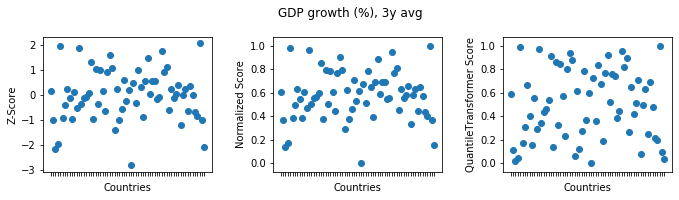

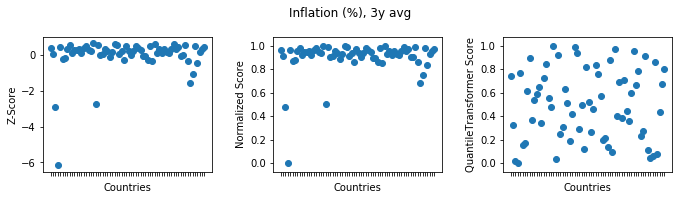

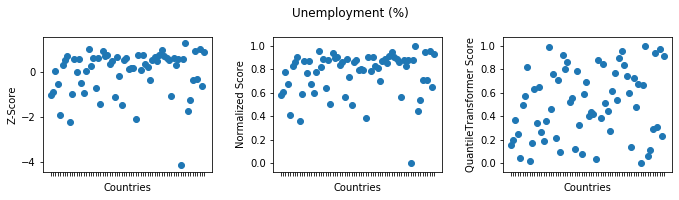

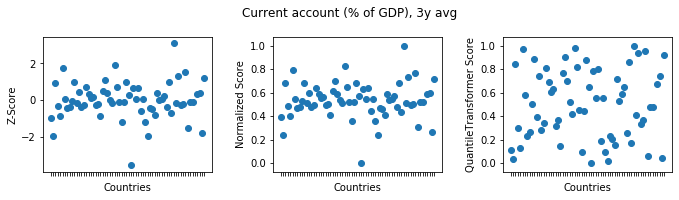

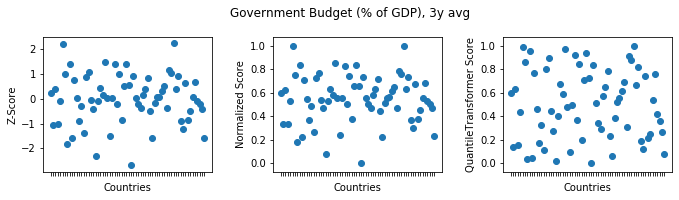

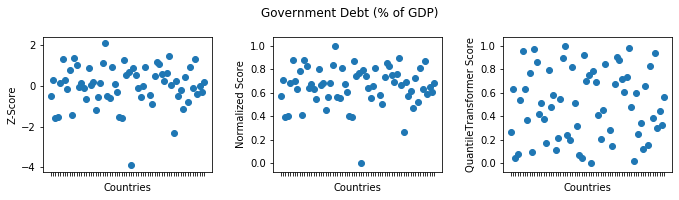

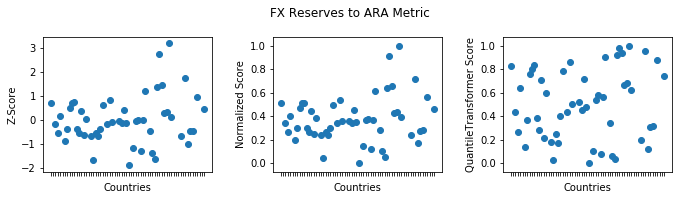

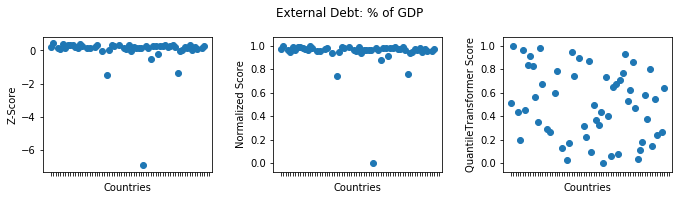

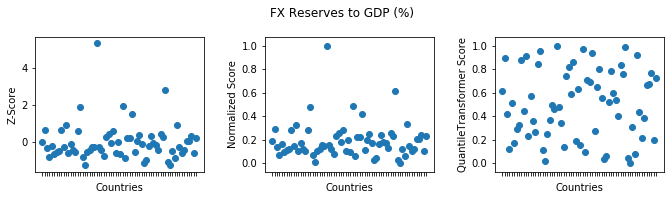

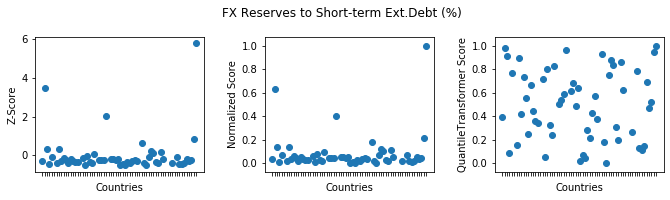

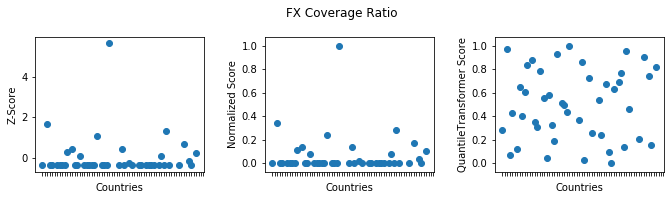

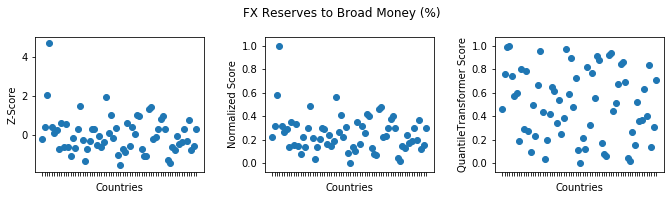

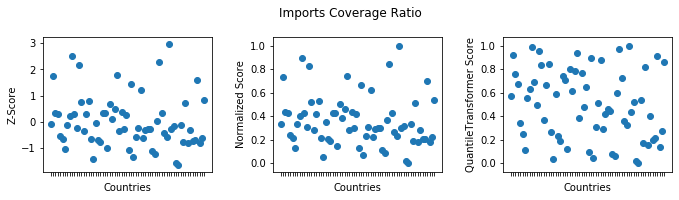

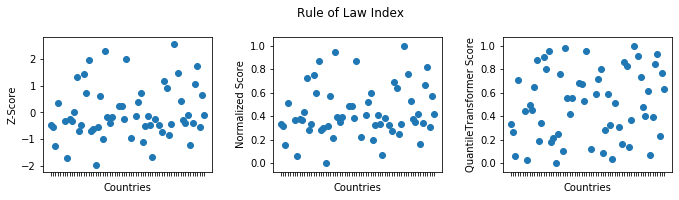

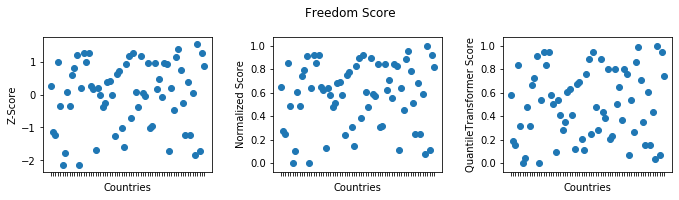

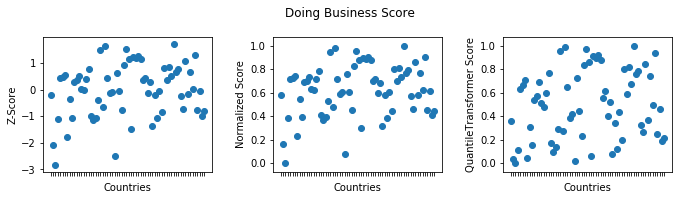

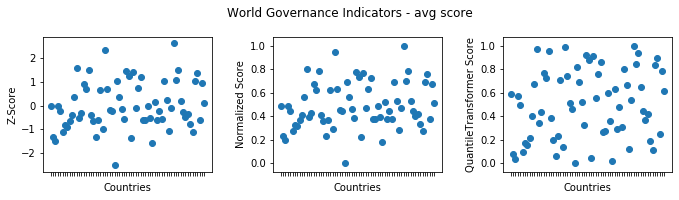

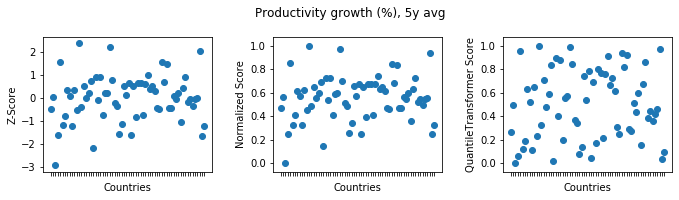

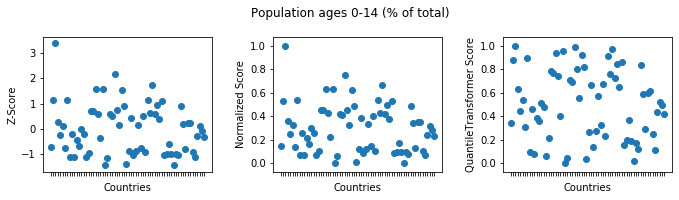

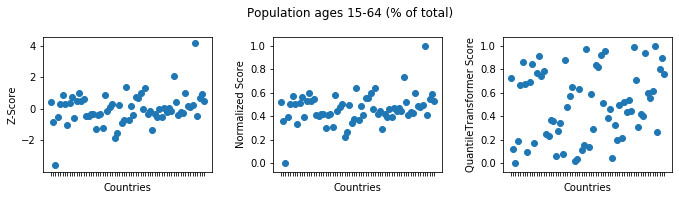

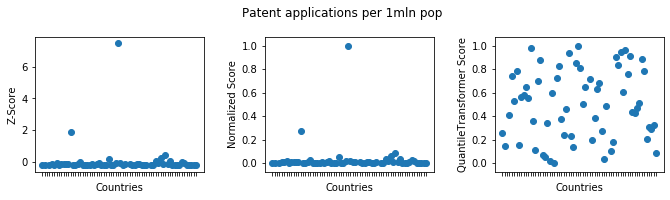

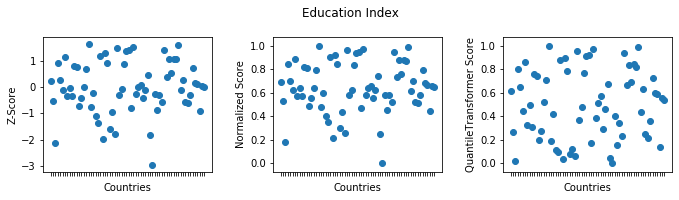

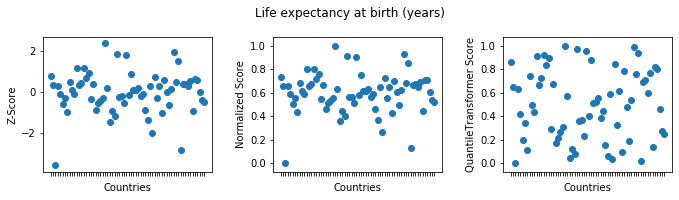

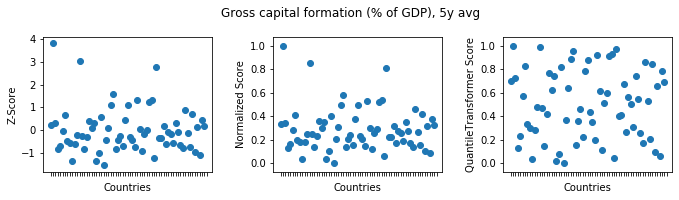

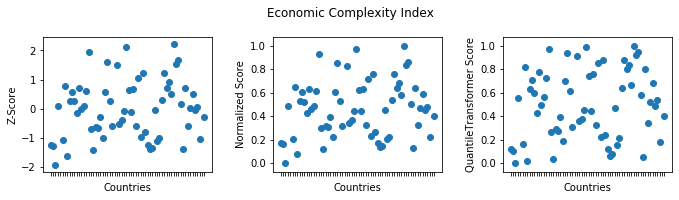

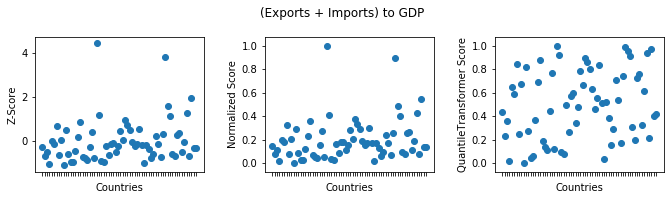

In [48]:
#compare the results of different transformations:
for col in df_standardized.columns:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,3))
    fig.tight_layout(pad=3.0)
    fig.suptitle(col)
    ax1.scatter(df_standardized.index.get_level_values(1), df_standardized[col])
    ax1.set_ylabel ("Z-Score")
    ax1.set_xlabel ("Countries")
    ax1.set_xticklabels ("")
    ax2.scatter(df_normalized.index.get_level_values(1), df_normalized[col])
    ax2.set_ylabel ("Normalized Score")
    ax2.set_xlabel ("Countries")
    ax2.set_xticklabels ("")
    ax3.scatter(df_transformed.index.get_level_values(1), df_transformed[col])
    ax3.set_ylabel ("QuantileTransformer Score")
    ax3.set_xlabel ("Countries")
    ax3.set_xticklabels ("")
    plt.show()

### 6. DERIVING THE FINAL SCORES AND VISUALIZATIONS

### 6.1. Final Scores and Tables 

So far we created the following DataFrames that we are interested in:
- combined_data - our combined data with all indicators
- df - copy of combined_data for transformational purposes
- df_transformed - our transformed data using QantileTransformer()
- separate DataFrames for each group of factors - macro_stability, external_vulnerability, institutional_strenght, long_term_growth

What we would like to end up with is (for visualization purposes):
- a dataframe with all the final scores 
- separate DataFrames for each group of factors with indicators and final scores

For that purpose **we are going to calculate the final scores within the transformed dataframe (df_transformed) - and then used it as a source for our final tables.**  

Lets recall the weights for our scores that we defined in the beginning of this project:
- Macro Stability Score - equal weights across the 6 indicators
- External Vulnerability Score - 50% FX Reserves to ARA Metric and 50% Traditional Metrics (equal weights to 6 indicators)
- Institutions Score - equal weights across the 4 indicators
- Total Risk Score (higher => lower risk) - equal weights to the three scores above
- Long-term Growth Score - equal weights to Demography Score (mean of 2 indicators), Productivity Drivers Score (equal weights to 6 indicators) and Productivity Historical Trend Score (last 5y average growth) 

In [49]:
#calculate scores within df_transformed - .mean() mehtod ignores NaN, which works just fine with us
df_transformed["Macro Stability Score"] = df_transformed[macro_factors].mean(axis=1)
df_transformed["External Traditional Metrics"] = df_transformed[external_factors[1:]].mean(axis=1)
df_transformed["External Vulnerability Score"] = df_transformed[["FX Reserves to ARA Metric","External Traditional Metrics"]].mean(axis=1)
df_transformed["Institutions Score"] = df_transformed[institutions_factors].mean(axis=1)
df_transformed["Total Risk Score (higher => lower risk)"] = df_transformed[["Macro Stability Score", "External Vulnerability Score","Institutions Score"]].mean(axis=1)
df_transformed["Demography Score"] = df_transformed[long_term_factors[1:3]].mean(axis=1)
df_transformed["Human Capital"] = 0.7 * df_transformed["Education Index"] + 0.3*df_transformed["Life expectancy at birth (years)"]
df_transformed["Economic Complexity"] = df_transformed[["Economic Complexity Index", "(Exports + Imports) to GDP"]].mean(axis=1)
df_transformed["Innovation"] = df_transformed["Patent applications per 1mln pop"]
df_transformed["Investments"] = df_transformed["Gross capital formation (% of GDP), 5y avg"]
df_transformed["Productivity Drivers Score"] = df_transformed[["Innovation","Human Capital","Investments","Economic Complexity","Demography Score","Institutions Score"]].mean(axis=1)
df_transformed["Productivity Historical Trend Score"] = df_transformed["Productivity growth (%), 5y avg"]
df_transformed["Long-term Growth Score"] = df_transformed[["Demography Score", "Productivity Drivers Score", "Productivity Historical Trend Score"]].mean(axis=1) 

In [50]:
#create a list of all the final scores
scores_list = ["Macro Stability Score", "External Vulnerability Score","Institutions Score", "Total Risk Score (higher => lower risk)", "Demography Score", "Productivity Drivers Score", "Productivity Historical Trend Score", "Long-term Growth Score"]
#create a new dataframe with the scores only
df_scores = df_transformed[scores_list]

In [51]:
#add the final scores to the seperate dataframes 
macro_stability[scores_list[0]] = df_scores[scores_list[0]]
external_vulnerability[scores_list[1]] = df_scores[scores_list[1]]
institutional_strenght[scores_list[2]] = df_scores[scores_list[2]]
long_term_growth[scores_list[4]] = df_scores[scores_list[4]]
long_term_growth[scores_list[5]] = df_scores[scores_list[5]]
long_term_growth[scores_list[6]] = df_scores[scores_list[6]]
long_term_growth[scores_list[-1]] = df_scores[scores_list[-1]]

### 6.2 Useful Visualizations

In this last section we review some possible useful visualizations of our data that will help us draw the final conclusions of our project. 

In [52]:
#define a function that applies a conditional formatting to our dataframes
def apply_style(df):
    return df.style.background_gradient(cmap= "BuGn").format("{:.2f}")

In [53]:
#plot dataframe with all scores
apply_style(df_scores.sort_values("Total Risk Score (higher => lower risk)", ascending = False))

,,,Macro Stability Score,External Vulnerability Score,Institutions Score,Total Risk Score (higher => lower risk),Demography Score,Productivity Drivers Score,Productivity Historical Trend Score,Long-term Growth Score
Country,Code,Region,,,,,,,,
Czech Republic,CZE,Europe,0.74,0.75,0.91,0.80,0.22,0.78,0.58,0.53
Israel,ISR,Asia,0.64,0.81,0.74,0.73,0.42,0.67,0.34,0.47
South Korea,KOR,Asia,0.73,0.55,0.90,0.73,0.50,0.82,0.54,0.62
Bulgaria,BGR,Europe,0.72,0.78,0.65,0.72,0.12,0.51,0.65,0.43
Thailand,THA,Asia,0.81,0.87,0.44,0.71,0.62,0.53,0.86,0.67
Poland,POL,Europe,0.72,0.58,0.81,0.70,0.34,0.67,0.82,0.61
Hong Kong,HKG,Asia,0.76,0.52,0.82,0.70,0.44,0.69,0.55,0.56
Singapore,SGP,Asia,0.68,0.56,0.82,0.69,0.50,0.82,0.51,0.61
Peru,PER,America,0.66,0.92,0.46,0.68,0.57,0.36,0.25,0.39


In [54]:
#review scoring by regions
region_to_slice = "Europe"
apply_style(df_scores.loc[(slice(None), slice(None), region_to_slice),:])

,,,Macro Stability Score,External Vulnerability Score,Institutions Score,Total Risk Score (higher => lower risk),Demography Score,Productivity Drivers Score,Productivity Historical Trend Score,Long-term Growth Score
Country,Code,Region,,,,,,,,
Albania,ALB,Europe,0.41,0.65,0.46,0.51,0.53,0.49,0.26,0.43
Belarus,BLR,Europe,0.52,0.21,0.34,0.36,0.49,0.66,0.18,0.45
Bosnia and Herzegovina,BIH,Europe,0.55,0.71,0.33,0.53,0.39,0.47,0.52,0.46
Bulgaria,BGR,Europe,0.72,0.78,0.65,0.72,0.12,0.51,0.65,0.43
Croatia,HRV,Europe,0.57,0.60,0.74,0.64,0.15,0.58,0.48,0.40
Czech Republic,CZE,Europe,0.74,0.75,0.91,0.80,0.22,0.78,0.58,0.53
Hungary,HUN,Europe,0.60,0.41,0.64,0.55,0.26,0.67,0.57,0.50
Latvia,LVA,Europe,0.61,0.03,0.87,0.50,0.20,0.64,0.78,0.54
Lithuania,LTU,Europe,0.67,0.17,0.92,0.58,0.22,0.61,0.69,0.50


In [55]:
#plot a seperate dataframe with group of factors
df_factors_interested_in = long_term_growth
score_to_sortby = "Long-term Growth Score"
ascending_true_or_false = False
apply_style(df_factors_interested_in.sort_values(score_to_sortby, ascending = ascending_true_or_false))

,,,"Productivity growth (%), 5y avg",Population ages 0-14 (% of total),Population ages 15-64 (% of total),Patent applications per 1mln pop,Education Index,Life expectancy at birth (years),"Gross capital formation (% of GDP), 5y avg",Economic Complexity Index,(Exports + Imports) to GDP,Demography Score,Productivity Drivers Score,Productivity Historical Trend Score,Long-term Growth Score
Country,Code,Region,,,,,,,,,,,,,
China,CHN,Asia,6.62,17.80,70.72,868.51,0.64,76.70,43.17,0.69,0.36,0.63,0.61,1.00,0.75
Mongolia,MNG,Asia,3.73,30.80,65.01,34.29,0.77,69.69,31.80,-0.79,1.26,0.65,0.63,0.91,0.73
Malaysia,MYS,Asia,3.06,23.69,69.38,37.47,0.72,76.00,24.30,0.97,1.23,0.69,0.67,0.80,0.72
Vietnam,VNM,Asia,5.94,23.21,69.23,6.29,0.63,75.32,26.84,-0.62,2.07,0.66,0.47,0.97,0.70
India,IND,Asia,6.26,26.62,67.00,10.65,0.56,69.42,31.00,0.36,0.38,0.64,0.47,0.98,0.70
Armenia,ARM,Asia,4.99,20.77,67.75,37.88,0.75,74.94,19.58,nan,0.92,0.55,0.54,0.95,0.68
Thailand,THA,Asia,3.55,16.82,70.77,14.49,0.66,76.93,23.10,0.71,1.10,0.62,0.53,0.86,0.67
Indonesia,IDN,Asia,3.30,26.22,67.73,5.52,0.62,71.51,33.99,-0.31,0.36,0.67,0.44,0.85,0.65
Georgia,GEO,Asia,3.62,20.03,64.91,25.03,0.84,73.60,27.73,-0.06,1.17,0.37,0.63,0.88,0.62


In [56]:
#review specific country
df_scores.loc[["Bulgaria"]]

,,,Macro Stability Score,External Vulnerability Score,Institutions Score,Total Risk Score (higher => lower risk),Demography Score,Productivity Drivers Score,Productivity Historical Trend Score,Long-term Growth Score
Country,Code,Region,,,,,,,,
Bulgaria,BGR,Europe,0.72,0.78,0.65,0.72,0.12,0.51,0.65,0.43


In [57]:
#review top countries by specific score
score_interested_in = "Long-term Growth Score"
ascending_true_or_false = False
top_numbers = 10
pd.DataFrame(df_scores.sort_values(score_interested_in, ascending = ascending_true_or_false)[score_interested_in][:top_numbers])

,,,Long-term Growth Score
Country,Code,Region,
China,CHN,Asia,0.75
Mongolia,MNG,Asia,0.73
Malaysia,MYS,Asia,0.72
Vietnam,VNM,Asia,0.70
India,IND,Asia,0.70
Armenia,ARM,Asia,0.68
Thailand,THA,Asia,0.67
Indonesia,IDN,Asia,0.65
Georgia,GEO,Asia,0.62


In [58]:
#review top 10 (high & low) scoring countries in each score
for score in scores_list:
    print(pd.DataFrame(df_scores.sort_values(score, ascending = False)[score][:10]))
    print(pd.DataFrame(df_scores.sort_values(score, ascending = True)[score][:10]))
    print("========================================================================")

                                  Macro Stability Score
Country              Code Region                       
Thailand             THA  Asia                     0.81
Hong Kong            HKG  Asia                     0.76
United Arab Emirates ARE  Asia                     0.74
Czech Republic       CZE  Europe                   0.74
South Korea          KOR  Asia                     0.73
Bulgaria             BGR  Europe                   0.72
Poland               POL  Europe                   0.72
Philippines          PHL  Asia                     0.70
Slovenia             SVN  Europe                   0.70
Singapore            SGP  Asia                     0.68
                           Macro Stability Score
Country      Code Region                        
Lebanon      LBN  Asia                      0.12
Argentina    ARG  America                   0.14
Tunisia      TUN  Africa                    0.14
South Africa ZAF  Africa                    0.20
Jordan       JOR  Asia            

In [59]:
#create a column for grouping purposes
df_scores["Regions"] = df_scores.index.get_level_values(2)
#define a function for plotting the scores in ascending order 
def plot_sorted_score (score):
    fig = plt.figure(figsize=(17, 4))
    gs = gridspec.GridSpec(1,2, width_ratios=[5,1])
    ax1 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[1])
    fig.tight_layout(pad=3.0)
    fig.suptitle(score, size = 20)
    dataset = df_scores.sort_values(score)
    colors = {"Asia":"green", "America":"orange", "Europe":"blue", "Africa":"red"}
    sns.barplot(ax= ax1, data = dataset, x = dataset.index.get_level_values(0), y = dataset[score], hue = "Regions", dodge = False, palette = colors, alpha = 0.5)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, fontweight='light', fontsize=13)
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    dataset1 = df_scores.sort_values(score).groupby("Regions").mean()
    sns.barplot(ax = ax2, data = dataset1, x = dataset1.index.get_level_values(0), y = dataset1[score],  palette = colors, alpha = 0.5)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, fontweight='light', fontsize=13)
    ax2.set_xlabel("")
    ax2.set_ylabel("")
    sns.despine()
    #adding text at the end of each bar
    for p in ax1.patches:
        ax1.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, -12), 
                    textcoords = 'offset points', rotation=90)
    for p in ax2.patches:
        ax2.annotate(format(p.get_height(), '.2f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, -12), 
                    textcoords = 'offset points')

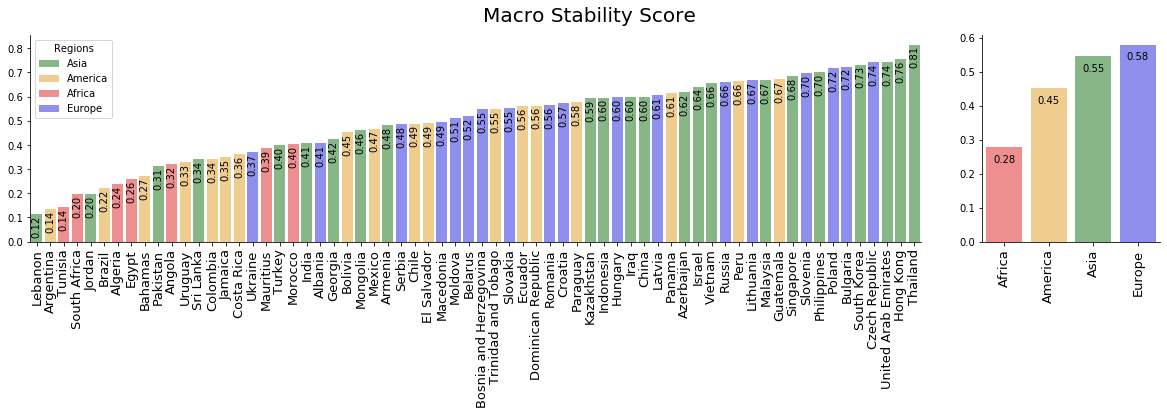

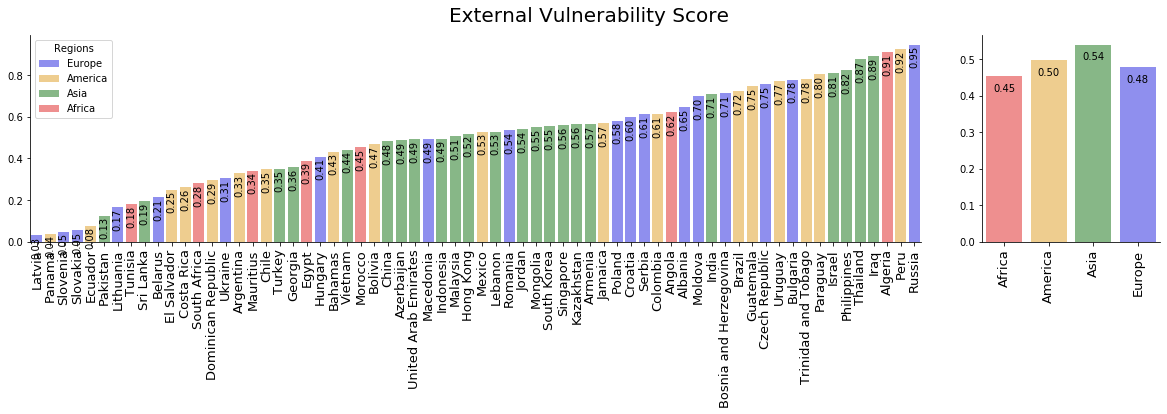

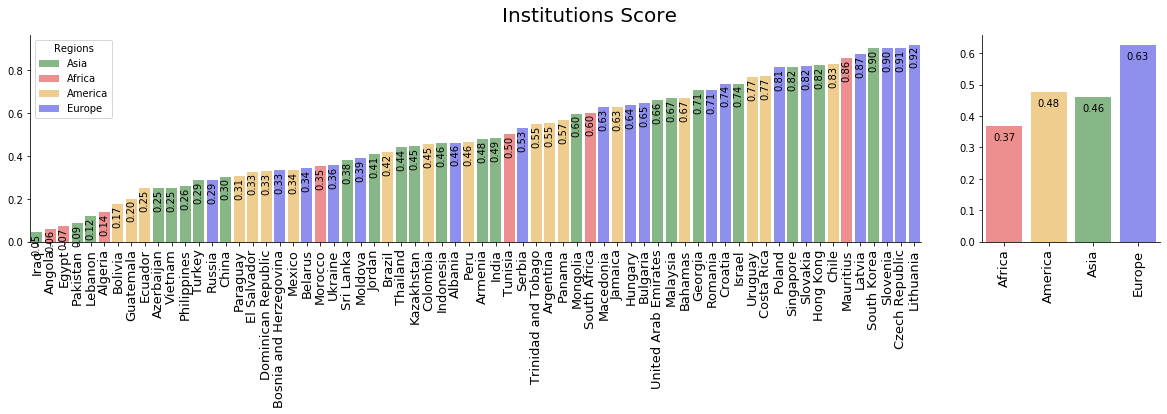

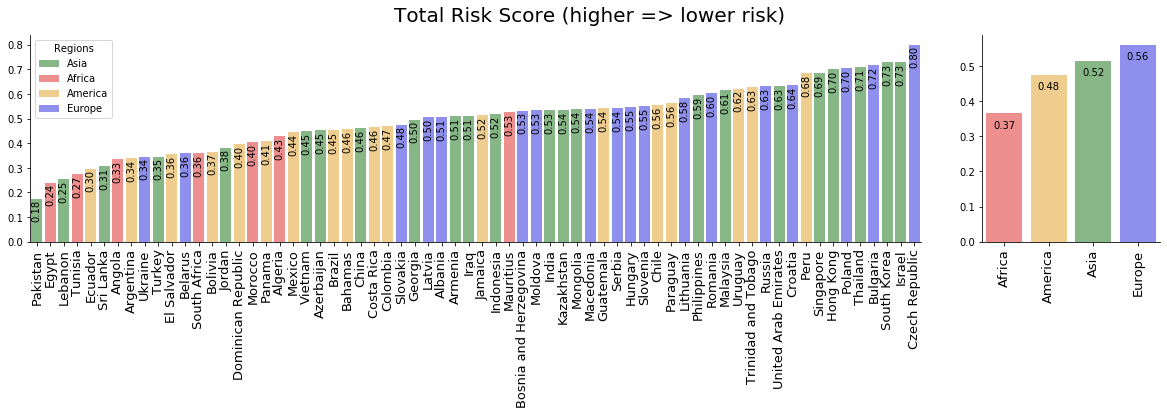

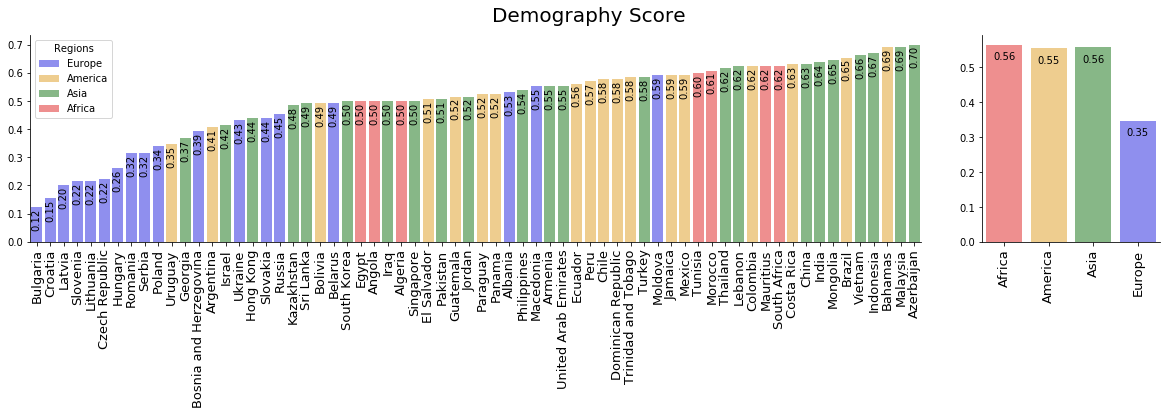

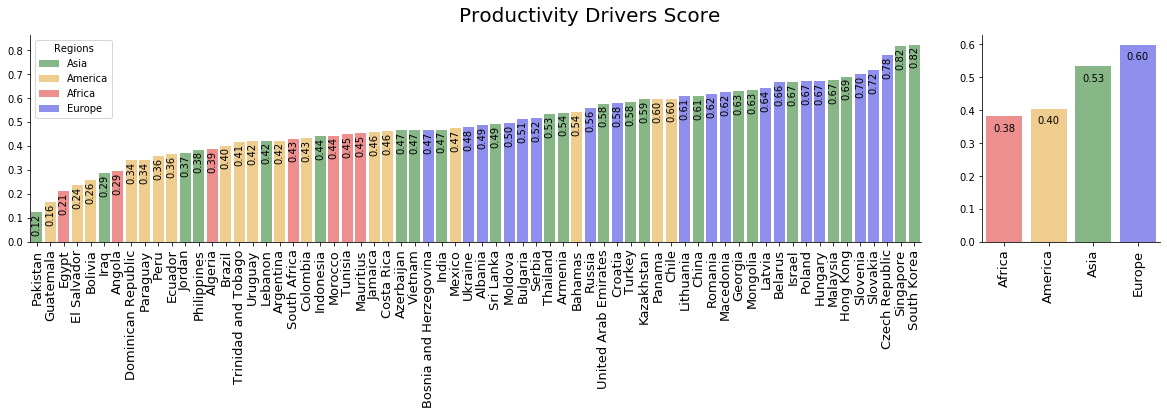

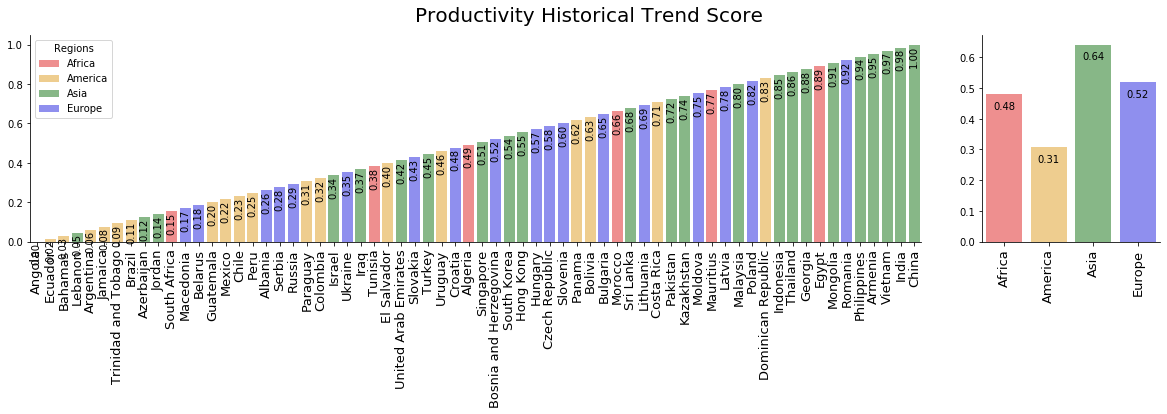

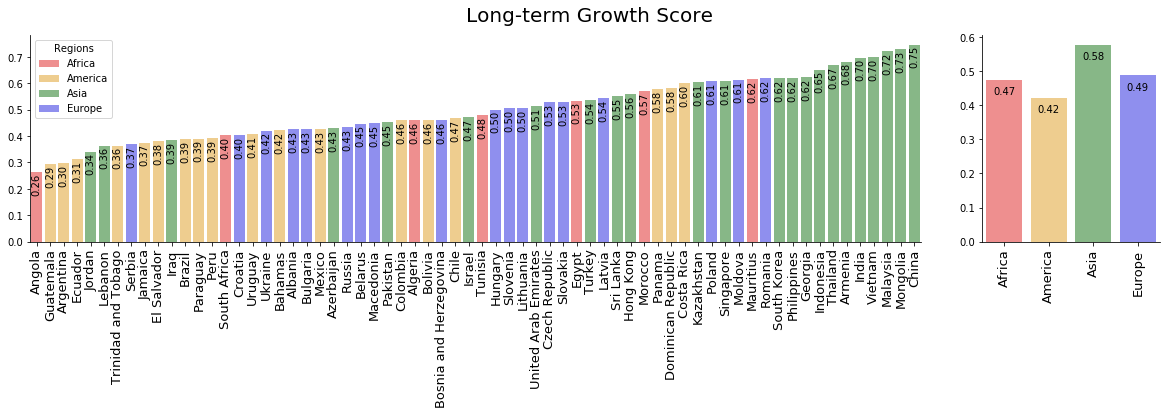

In [60]:
#plot the final scores
for score in scores_list: 
    plot_sorted_score(score)

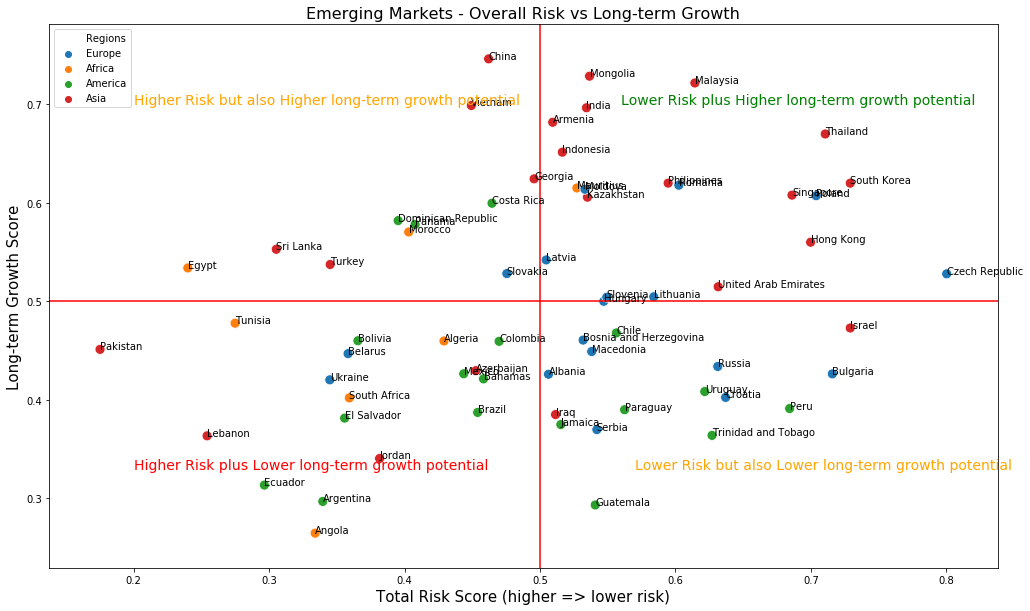

In [61]:
#scatter plot with Risk vs Long-term growth Scores 
fig, ax = plt.subplots(figsize = (17,10))
x = df_scores["Total Risk Score (higher => lower risk)"]
y = df_scores["Long-term Growth Score"]
ax = sns.scatterplot(data = df_scores, x=x , y=y, hue = "Regions", s=100)
for i, txt in enumerate(x.index.get_level_values(0)):
    ax.annotate(txt, (x[i], y[i]))
ax.text(0.2, 0.7, 'Higher Risk but also Higher long-term growth potential ', color = "orange", size =14)
ax.text(0.2, 0.33, 'Higher Risk plus Lower long-term growth potential', color = "red", size =14)
ax.text(0.56, 0.7, 'Lower Risk plus Higher long-term growth potential', color = "green", size =14)
ax.text(0.57, 0.33, 'Lower Risk but also Lower long-term growth potential', color = "orange", size =14)
ax.set_title ("Emerging Markets - Overall Risk vs Long-term Growth", fontsize= 16)
ax.set_ylabel ("Long-term Growth Score", size = 15)
ax.set_xlabel ("Total Risk Score (higher => lower risk)", size = 15)
ax.axhline(y = 0.5, color='r')
ax.axvline(x = 0.5, color='r')
ax.legend(loc = "upper left")
plt.show()

In [62]:
#selecting countries with combination of risk and growth scores
long_term_growth_threshold = 0.55
total_risk_threshold = 0.55
df_scores.loc[(df_scores["Long-term Growth Score"] > long_term_growth_threshold) & (df_scores["Total Risk Score (higher => lower risk)"] > total_risk_threshold),["Long-term Growth Score", "Total Risk Score (higher => lower risk)"]]

,,,Long-term Growth Score,Total Risk Score (higher => lower risk)
Country,Code,Region,,
Hong Kong,HKG,Asia,0.56,0.70
South Korea,KOR,Asia,0.62,0.73
Malaysia,MYS,Asia,0.72,0.61
Philippines,PHL,Asia,0.62,0.59
Poland,POL,Europe,0.61,0.70
Romania,ROU,Europe,0.62,0.60
Singapore,SGP,Asia,0.61,0.69
Thailand,THA,Asia,0.67,0.71


In [63]:
scores_list

['Macro Stability Score',
 'External Vulnerability Score',
 'Institutions Score',
 'Total Risk Score (higher => lower risk)',
 'Demography Score',
 'Productivity Drivers Score',
 'Productivity Historical Trend Score',
 'Long-term Growth Score']

[Text(0, 0, '0.0'),
 Text(0, 0, '0.1'),
 Text(0, 0, '0.2'),
 Text(0, 0, '0.3'),
 Text(0, 0, '0.4'),
 Text(0, 0, '0.5'),
 Text(0, 0, '0.6'),
 Text(0, 0, '0.7'),
 Text(0, 0, '0.8'),
 Text(0, 0, '0.9'),
 Text(0, 0, '1.0')]

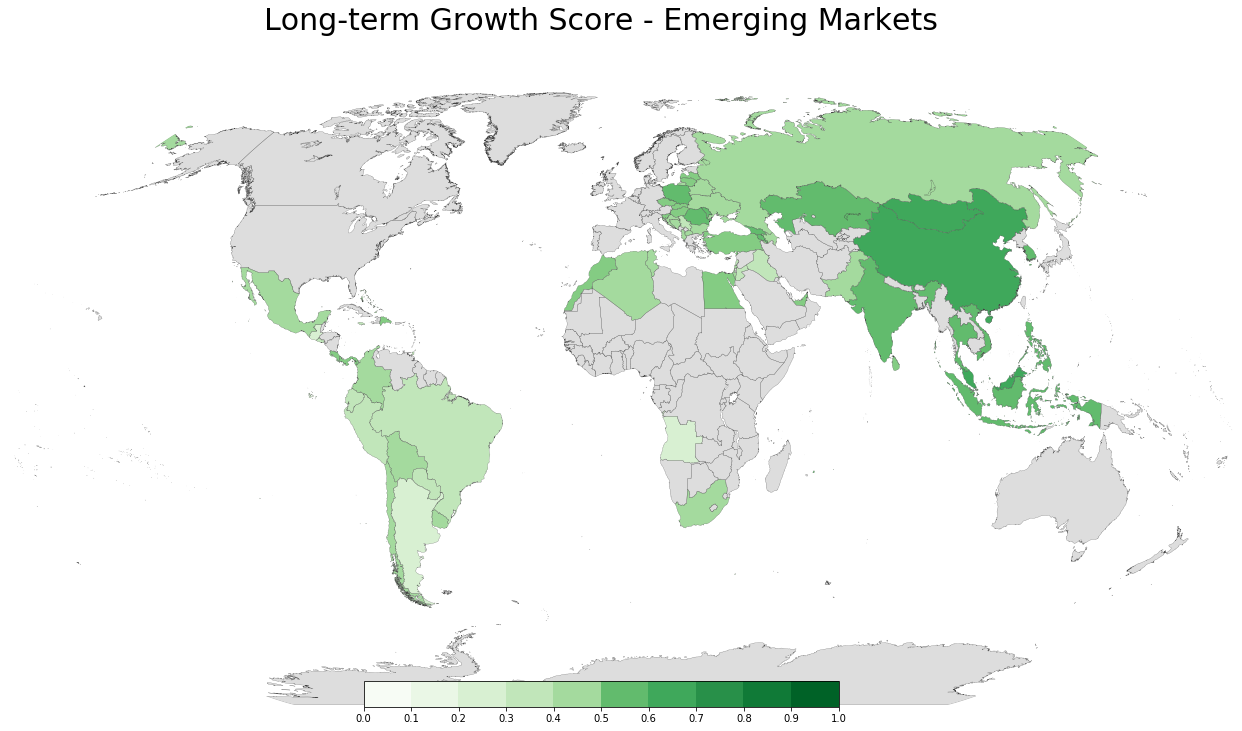

In [64]:
#create world map of specific score

#choose score
indicator = scores_list[7]

#intitial settings
num_colors = 11
values = df_scores[indicator]
scheme = [plt.get_cmap("Greens")(i/num_colors) for i in range(num_colors)]
bins = np.linspace(0,1,num_colors)
df_scores["bin"] = np.digitize(values, bins) -1

#draw the map
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, frame_on=False)
fig.suptitle(indicator + " - Emerging Markets", fontsize=30, y=.95)
m = Basemap(lon_0=0, projection="robin")
m.drawmapboundary(color="w")
#shapefile dowloaded from www.naturalearthdata.com
m.readshapefile("ne_10m_admin_0_countries_lakes", "units", color='#444444', linewidth=.2)

#colorizing
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADM0_A3']
    if iso3 not in df_scores.index.get_level_values(1):
        color = '#dddddd'
    else:
        color = scheme[df_scores.loc[(slice(None), iso3),"bin"][0]]

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

#draw color legend
ax_legend = fig.add_axes([0.35, 0.14, 0.3, 0.03], zorder=3)
cmap = mpl.colors.ListedColormap(scheme)
cb = mpl.colorbar.ColorbarBase(ax_legend, cmap=cmap, ticks=bins, boundaries=bins, orientation='horizontal')
cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

### 7. CONCLUSION

In this project we tried to answer two questions:

1. Which countries across Emerging Markets had the worst “pre-existing” conditions before COVID-19 - and thus are at high risk of deep and painful economic recession 
2. Which Emerging Markets possess the best combination of long-term economic growth prerequisites – and thus are likely to remain an attractive growth story and after the crisis is over

Our analysis allows for many conclusions on these questions (including regional differences) but the most interesting ones look to be: 
-	**A lot of Asian countries offer the best of both worlds – low risk and high potential growth**. These include mainly the former “Asian tigers” (South Korea, Hong Kong, Singapore) but also some others like Malaysia, Philippines and Thailand that score highly on almost every group of factors. The big regional players like China, India & Indonesia (also Vietnam) are also very strong growth stories but look more vulnerable
-	**There are also some European countries that score highly on both dimensions** - namely Czech Republic, Poland and Romania as poor demographics is being compensated by high productivity
-	**The worst performers in terms of both high risk & low potential growth are mainly from America & Africa**, but also two European countries – Ukraine & Belarus; poor productivity (historical and drivers) is limiting both America and Africa despite the demography boost
-	**The “low-risk, low-growth” combination is very popular among European and American countries** – despite that different factors are behind that combination – low risk is owed to strong Institutions and high Macro Stability in Europe but mainly low External Vulnerability in America, while low growth is defined by poor demography in Europe and weak productivity in America.

**Further research**

Some further applications of this project include:

- **Machine Learning**: create a time series of the scoring model and backtest it if it explains well economic variability across countries over time - and whether it can be used as a predictor of the future
- **Relative Value analysis**: Compare the Risk score to official credit ratings (Moody's, Standard & Poors, Fitch) and financial markets perceiption of country risk (Credit Default Spreads) to identify potential attractive investment opportunities

**References:**

[1] Assessing Reserve Adequacy - by IMF (2011): https://www.imf.org/en/Publications/Policy-Papers/Issues/2016/12/31/Assessing-Reserve-Adequacy-PP4547

[2] Global Productivity: Trends, Drivers, and Policies - by WB (2020): https://www.worldbank.org/en/research/publication/global-productivity